In [7]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [8]:

true_slope = 5
true_intercept = 10
true_sigma = 1

num_points = 10

x_vals = np.linspace(0, 1, num_points)
true_y_vals = true_slope * x_vals + true_intercept
y_vals = true_y_vals + np.random.normal(scale=true_sigma, size=num_points)

true_params = {'slope': true_slope, 'intercept': true_intercept, 'sigma': true_sigma}

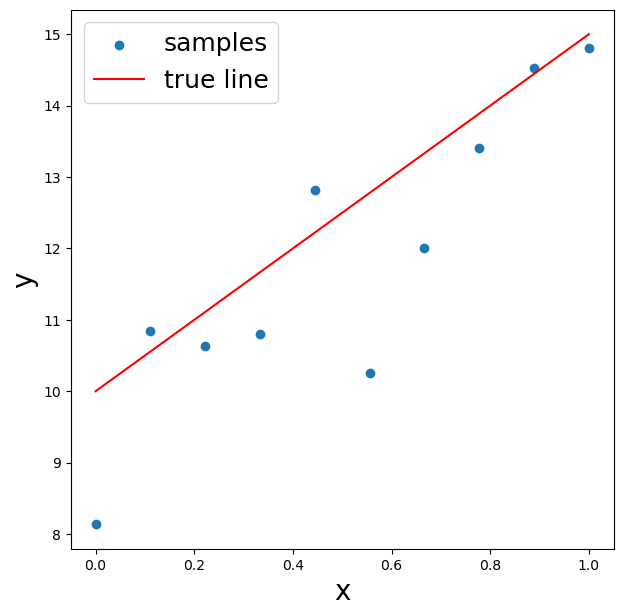

In [9]:
plt.figure(figsize=(7,7))
p1 = plt.scatter(x_vals, y_vals)
p2, = plt.plot(x_vals, true_y_vals, color='r')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.legend((p1, p2), ('samples', 'true line'), fontsize=18)

In [10]:
clf = LinearRegression()
clf.fit(x_vals.reshape(-1,1), y_vals)
preds = clf.predict(x_vals.reshape(-1,1))
resids = preds - y_vals

print('True Model:')
print('y_true = %s*x + %s'%(true_slope, true_intercept))
print('True sigma: %s\n'%true_params['sigma'])

print('Estimated Model:')
print('y_hat = %s*x + %s'%(clf.coef_[0], clf.intercept_))
print('Sd Residuals: %s'%(resids.std()))

mle_estimates = {'slope': clf.coef_[0], 'intercept': clf.intercept_, 'sigma': resids.std()}

True Model:
y_true = 5*x + 10
True sigma: 1

Estimated Model:
y_hat = 5.496743827115258*x + 9.074172804447986
Sd Residuals: 0.9205103146280106


In [11]:
with pm.Model() as model:
    #priors
    sigma = pm.Exponential("sigma", lam=1.0)
    intercept = pm.Normal("intercept", mu=0, sigma=20)
    slope = pm.Normal("slope", mu=0, sigma=20)

    #Likelihood
    likelihood = pm.Normal("y", mu=slope*x_vals + intercept, sigma=sigma, observed=y_vals)

    #posterior
    trace = pm.sample(1000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, intercept, slope]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 89 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


<Figure size 700x700 with 0 Axes>

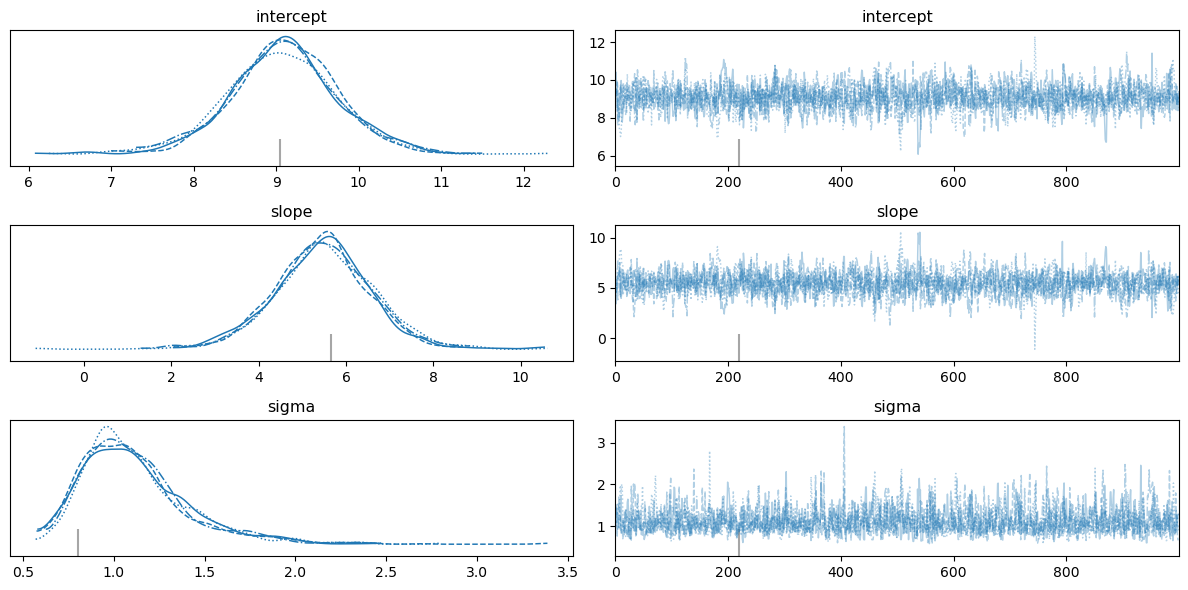

In [12]:
plt.figure(figsize=(7, 7))
pm.plot_trace(trace)
plt.tight_layout()

In [13]:
for var in ['slope', 'intercept', 'sigma']:
    plt.figure(figsize=(10,4))
    vals = trace.get_values(var)
    mean, lower, upper = round(vals.mean(),2), round(vals.mean()-vals.std(),2), round(vals.mean()+vals.std(),2)
    sns.distplot(vals)
    posterior_est = plt.axvline(mean, color='b')
    mle_est = plt.axvline(mle_estimates[var], color='b', linestyle='dotted')
    plt.axvline(lower, color='r', linestyle='--')
    plt.axvline(upper, color='r', linestyle='--')
    plt.title('%s [True = %s]\nPosterior Mean: %s\nBound: (%s, %s)'%(var,true_params[var],mean,lower,upper), fontsize=20)
    true_val = plt.axvline(true_params[var], color='k')

    plt.legend((true_val, mle_est, posterior_est), ('true', 'MLE', 'Posterior Mean'), fontsize=18)

    plt.show()

AttributeError: 'InferenceData' object has no attribute 'get_values'

<Figure size 1000x400 with 0 Axes>